

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  A commercially successful movie not only entertains audience, but also brings tremendous profit to movie companies. 
In this project, we are going to explore a dataset from Kaggle website, which contains about 10000 movies collected from The Movie Database(TMDb), spanning across 56 years with 21 variables such as user popularity, ratings, budget, and revenue.

  > Question that can be analyzed from this data set include:
  Part1: Find the quantitative features that are associated with Successful Movies
  Question 1. What features are associated with the popularity?
  Question 2. What features are associated with voting score?
  Part 2: Find the categorical features that are associated with Successful Movies
  Question 1. What movie types receive higher rating?
  Question 2. What movie types are more profit?
  Question 3. Who are the most popular cast, directors?
  Question 4. Are movies casted by top cast more popular?
  

In [9]:
# To investigate the data, we need to import the following packages:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
df=pd.read_csv('tmdb-movies.csv',encoding='cp1252')




<a id='wrangling'></a>
## Data Wrangling
> In this section of the report,I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [10]:
#2 check the first few rows to see what variables are. 
#The cast and genre columnscontains with multiple values and separated by| character. 
#Should it be separated and put each of them by column?
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,174799923.1,1.385749e+09


In [11]:
#2 check the information of the dataframe.First, there are some columns not related to the data analysis,
# including id, imdb_id,overview, release_date, also there are too many missing values for the three columns: 
# homepage, keywords, tagline and production_companies. so we are going to remove those columns later.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [12]:
# check the shape of the dataframe
df.shape

(10866, 21)

In [13]:
# check the data types of the dataframe, the datatypes look fine, so I don't need to change datatypes.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [14]:
# check duplicates of the dataframe. There is one duplicate that need to be drop
df.duplicated().sum()

1

In [15]:
# check null values of the dataframe. There is one duplicate that need to be drop. 
#There are over 1000 missing values for homepage, tagline, keywords, and production_companies,
#which are not so neceessary for the data analysis. So I decide to drop them. 
#For the missing values in cast, genres, director, I will keep the three columns and decide what to do later.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [16]:
# check unique values of the dataframe. 
# For the budget, revenue, runtime, vote_count, vote_average, the unique values are very low. I will further look at it. 
df.nunique()


id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [17]:
#check describe to figure out those low unique values.
# the minimum budget, revenue and runtime are 0, which does not make sense.
# So I need make cleaning descision on zero values of budget, revenue, and runtime
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
>After a sneak peak of the dataframe. I summarized the data cleaning descisions below:
1 drop unnecessary columns, including, imdb_id,homepage,tagline, production_companies, release_date, overview. 
2 drop duplicates
3 drop null values
4 make cleaning descisions on 0 values in budget, revenue, and runtime.
5 The cast and genre columnscontains with multiple values and separated by| character. Separate the elements in these two columns.



In [18]:
# drop unneccessary variables
df.drop(['imdb_id','homepage','tagline', 'production_companies', 'release_date', 'overview'], axis=1, inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09


In [19]:
df.shape

(10866, 15)

In [20]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
#drop null values
df.dropna(inplace=True)

In [32]:
df.isnull().any()


id                False
popularity        False
budget            False
revenue           False
original_title    False
cast              False
director          False
keywords          False
runtime           False
genres            False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9306 entries, 0 to 10865
Data columns (total 15 columns):
id                9306 non-null int64
popularity        9306 non-null float64
budget            9306 non-null int64
revenue           9306 non-null int64
original_title    9306 non-null object
cast              9306 non-null object
director          9306 non-null object
keywords          9306 non-null object
runtime           9306 non-null int64
genres            9306 non-null object
vote_count        9306 non-null int64
vote_average      9306 non-null float64
release_year      9306 non-null int64
budget_adj        9306 non-null float64
revenue_adj       9306 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.1+ MB


In [24]:
df.shape

(9306, 15)

In [25]:
# clean 0 values in budget
df.query('budget==0').count()['id']

4479

In [26]:
#there are 4479 0 values, so I decide to replace 0 with null.
df['budget']=df['budget'].replace(0, np.nan)

In [27]:
df.query('budget==0').count()['id']

0

In [28]:
# clean 0 values in revenue
df.query('revenue==0').count()['id']


4695

In [29]:
#there are 4695 0 values, so I decide to replace 0 with null
df['revenue']=df['revenue'].replace(0, np.nan)

In [30]:
df.query('revenue==0').count()['id']


0

In [31]:
# clean 0 values in runtime
df.query('runtime==0').count()['id']


13

In [32]:
#there are only 13 zero values, so I decide to drop them
df['runtime']=df.loc[df['runtime']!=0]

In [33]:
df.query('runtime==0').count()['id']


0

In [44]:
#now check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9306 entries, 0 to 10865
Data columns (total 15 columns):
id                9306 non-null int64
popularity        9306 non-null float64
budget            4827 non-null float64
revenue           4611 non-null float64
original_title    9306 non-null object
cast              9306 non-null object
director          9306 non-null object
keywords          9306 non-null object
runtime           9293 non-null object
genres            9306 non-null object
vote_count        9306 non-null int64
vote_average      9306 non-null float64
release_year      9306 non-null int64
budget_adj        9306 non-null float64
revenue_adj       9306 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB


In [34]:
# now the min values make more sense after data cleaning. 
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9306.000000,9306.000000,4.827000e+03,4.611000e+03,9306.000000,9306.000000,9306.000000,9.306000e+03,9.306000e+03
mean,58328.057382,0.707981,3.191422e+07,9.263830e+07,247.627767,6.000355,2000.419514,1.991848e+07,5.929472e+07
std,86708.998238,1.063334,3.962340e+07,1.650279e+08,616.013851,0.909980,13.068678,3.619063e+07,1.545408e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10001.250000,0.230966,6.500000e+06,8.686120e+06,19.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,17183.500000,0.422673,1.850000e+07,3.456058e+07,47.000000,6.100000,2005.000000,5.072968e+05,0.000000e+00
75%,58484.500000,0.790917,4.000000e+07,1.031031e+08,181.000000,6.600000,2011.000000,2.579055e+07,4.649618e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

>Now that I have trimmed and cleaned your data, I am ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 

###   Part1: Find the quantitative features that are associated with Successful Movies
  Question 1. What features are associated with the popularity?
  Question 2. What features are associated with voting score?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020688627BE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020688100978>]], dtype=object)

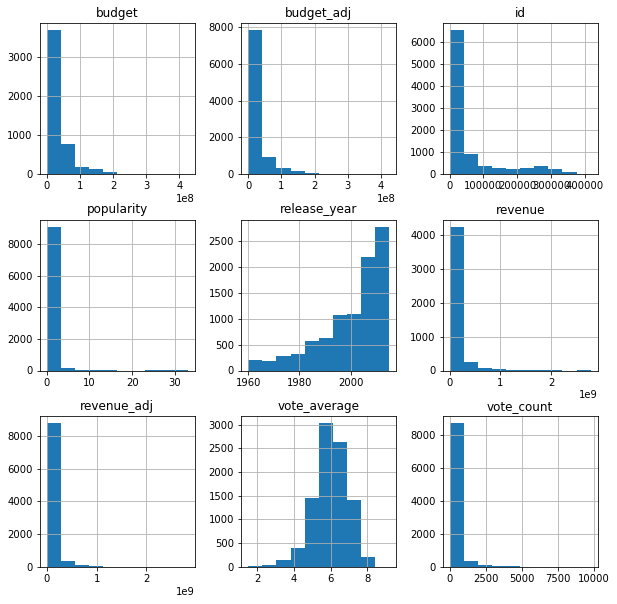

In [35]:
df.hist(figsize=(10,10))


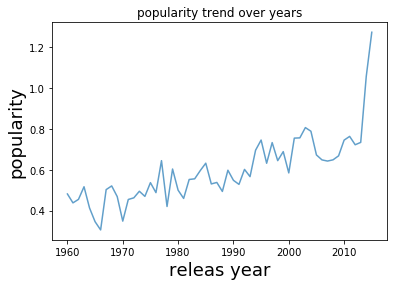

In [38]:
#Is the popularity associated with release year?
year_pop=df.groupby('release_year')['popularity'].mean()
year_pop.plot(title='popularity trend over years',alpha=.7)
plt.xlabel('releas year',fontsize=18)
plt.ylabel('popularity',fontsize=18)

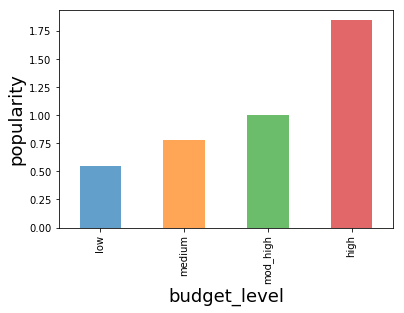

In [39]:
# Is the popularity associated with the budget?
min_value=df['budget'].min()
first_quantile=df['budget'].quantile(0.25)
second_quantile=df['budget'].quantile(0.5)
third_quantile=df['budget'].quantile(0.75)
max_value=df['budget'].max()
bin_edges=[min_value, first_quantile, second_quantile, third_quantile,max_value]
bin_names=['low','medium','mod_high','high']
df['budget_level']=pd.cut(df['budget'], bin_edges, labels=bin_names)
df.head()
budget_pop=df.groupby('budget_level')['popularity'].mean()
budget_pop.plot(kind='bar',alpha=0.7)
plt.xlabel('budget_level',fontsize=18)
plt.ylabel('popularity',fontsize=18)


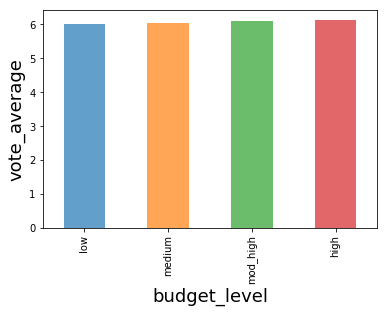

In [40]:
#does budget level associated with rating?
budget_pop=df.groupby('budget_level')['vote_average'].mean()
budget_pop.plot(kind='bar',alpha=0.7)
plt.xlabel('budget_level',fontsize=18)
plt.ylabel('vote_average',fontsize=18)

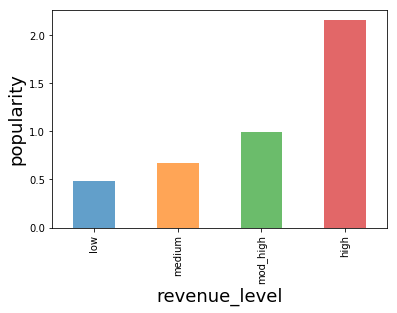

In [41]:
# does more popular movie have higher revenue?
min_value=df['revenue'].min()
first_quantile=df['revenue'].quantile(0.25)
second_quantile=df['revenue'].quantile(0.5)
third_quantile=df['revenue'].quantile(0.75)
max_value=df['revenue'].max()
bin_edges=[min_value, first_quantile, second_quantile, third_quantile,max_value]
bin_names=['low','medium','mod_high','high']
df['revenue_level']=pd.cut(df['revenue'], bin_edges, labels=bin_names)
vote_pop=df.groupby('revenue_level')['popularity'].mean()
vote_pop.plot(kind='bar',alpha=0.7)
plt.xlabel('revenue_level',fontsize=18)
plt.ylabel('popularity',fontsize=18)

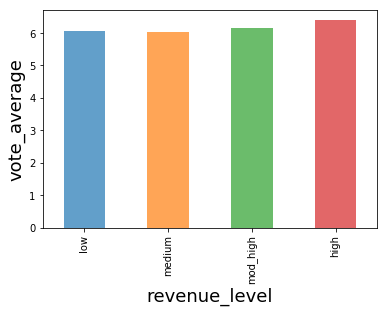

In [42]:
# does higher voting movie have higher revenue?
vote_pop=df.groupby('revenue_level')['vote_average'].mean()
vote_pop.plot(kind='bar',alpha=0.7)
plt.xlabel('revenue_level',fontsize=18)
plt.ylabel('vote_average',fontsize=18)

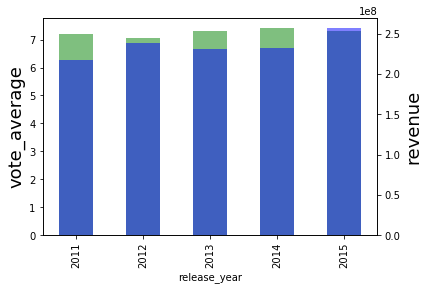

In [43]:
#find the top 100 movies by year, and the relation between rating and revenue in the most recent 5 years
top_voting=df.sort_values(by=['release_year','vote_average'], ascending=[True,False]).groupby('release_year').head(100)   
top_revenue=df.sort_values(by=['release_year','revenue'], ascending=[True,False]).groupby('release_year').head(100)
fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
top_voting.query('release_year > 2010').groupby('release_year')['vote_average'].mean().plot(kind='bar',color='green', ax=ax,alpha=0.5) 
top_revenue.query('release_year> 2010').groupby('release_year')['revenue'].mean().plot(kind='bar',color='blue',ax=ax2,alpha=0.5) 

ax.set_ylabel('vote_average',fontsize=18)
ax2.set_ylabel('revenue',fontsize=18)

plt.show()

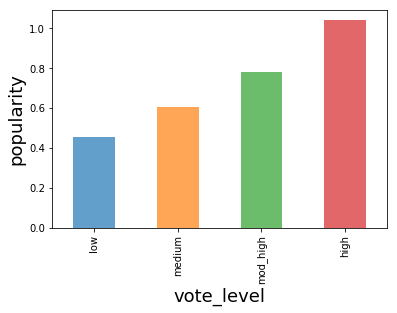

In [44]:
# are higher voting movie  more popular?
min_value=df['vote_average'].min()
first_quantile=df['vote_average'].quantile(0.25)
second_quantile=df['vote_average'].quantile(0.5)
third_quantile=df['vote_average'].quantile(0.75)
max_value=df['vote_average'].max()
bin_edges=[min_value, first_quantile, second_quantile, third_quantile,max_value]
bin_names=['low','medium','mod_high','high']
df['vote_level']=pd.cut(df['vote_average'], bin_edges, labels=bin_names)
vote_pop=df.groupby('vote_level')['popularity'].mean()
vote_pop.plot(kind='bar',alpha=0.7)
plt.xlabel('vote_level',fontsize=18)
plt.ylabel('popularity',fontsize=18)

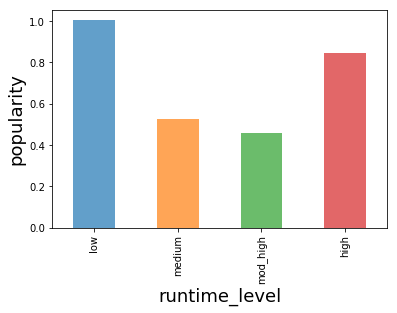

In [45]:
# Is runtime level associated with popularity?
min_value=df['runtime'].min()
first_quantile=df['runtime'].quantile(0.25)
second_quantile=df['runtime'].quantile(0.5)
third_quantile=df['runtime'].quantile(0.75)
max_value=df['runtime'].max()
bin_edges=[min_value, first_quantile, second_quantile, third_quantile,max_value]
bin_names=['low','medium','mod_high','high']
df['runtime_level']=pd.cut(df['runtime'], bin_edges, labels=bin_names)
runtime_pop=df.groupby('runtime_level')['popularity'].mean()
runtime_pop.plot(kind='bar',alpha=0.7)
plt.xlabel('runtime_level',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.show()

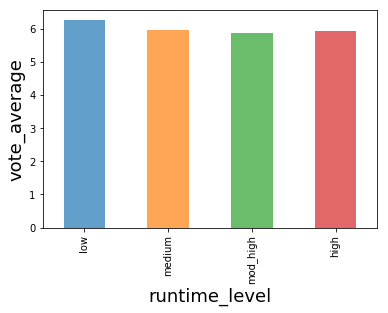

In [46]:
vote_pop=df.groupby('runtime_level')['vote_average'].mean()
vote_pop.plot(kind='bar',alpha=0.7)
plt.xlabel('runtime_level',fontsize=18)
plt.ylabel('vote_average',fontsize=18)
plt.show()

###  Part2: Find the categorical features that are associated with Successful Movies
  Question 1. What movie types receive higher rating?
  Question 2. What movie types are more profit?
  Question 3. Who are the most popular cast, directors?
  Question 4. Are movies casted by top cast more popular?
  

In [48]:
# Separate the elements in the cast and genre columns containing multiple values 
df['genres']=df['genres'].str.split("|",expand=True)
df['genres'].value_counts()



Drama              2135
Comedy             1998
Action             1411
Horror              779
Adventure           534
Thriller            416
Crime               356
Documentary         312
Animation           300
Fantasy             238
Science Fiction     181
Romance             152
Mystery             110
Family              107
Music                81
TV Movie             57
War                  55
Western              39
History              39
Foreign               6
Name: genres, dtype: int64

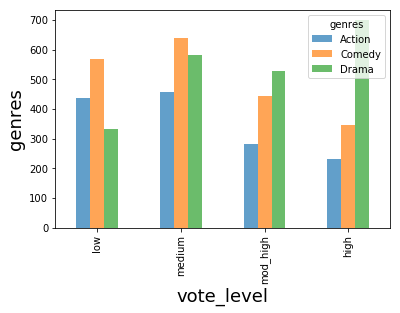

In [50]:
#Lets explor what are the movie types for those high rating movies?

top=df['genres'].value_counts().head(3).index
df.query('genres in @ top').groupby(['vote_level','genres']).size().unstack(fill_value=0).plot(kind='bar',alpha=0.7)
plt.xlabel('vote_level',fontsize=18)
plt.ylabel('genres',fontsize=18)
plt.show()

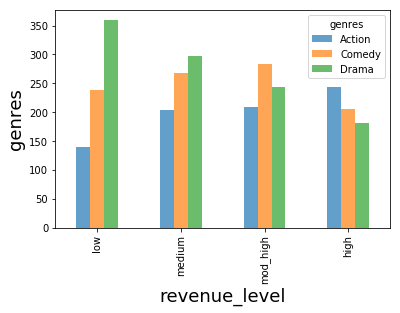

In [51]:
#Lets explor what are the movie types for those high profit movies?
top=df['genres'].value_counts().head(3).index
df.query('genres in @ top').groupby(['revenue_level','genres']).size().unstack(fill_value=0).plot(kind='bar',alpha=0.7)
plt.xlabel('revenue_level',fontsize=18)
plt.ylabel('genres',fontsize=18)
plt.show()

In [71]:
df['cast']=df['cast'].str.split("|",expand=True)
df['cast'].value_counts()

Nicolas Cage             48
Bruce Willis             39
Robert De Niro           39
Clint Eastwood           38
Johnny Depp              37
Tom Hanks                37
Sylvester Stallone       33
Denzel Washington        33
John Travolta            33
Tom Cruise               31
Robin Williams           31
John Cusack              29
Jean-Claude Van Damme    29
Arnold Schwarzenegger    29
Woody Allen              29
Al Pacino                28
Keanu Reeves             28
Sean Connery             28
Harrison Ford            28
Mel Gibson               28
Adam Sandler             28
Steve Martin             27
Samuel L. Jackson        27
Eddie Murphy             27
Steven Seagal            26
Michael Douglas          26
Kevin Costner            26
Ben Stiller              24
Sandra Bullock           24
Jeff Bridges             24
                         ..
Olivia Taylor Dudley      1
Taylor Swift              1
Stelian Urian             1
Olivia Munn               1
Danny Shayler       

In [55]:
#find out the top 5  cast, director, genres, keywords 
df['cast']=df['cast'].str.split("|",expand=True)
a=df['cast'].value_counts().index.tolist()
b=df['director'].value_counts().index.tolist()
c=df['keywords'].value_counts().index.tolist()
df['genres']=df['genres'].str.split("|",expand=True)
d=df['genres'].value_counts().index.tolist()
df_popular=pd.DataFrame({'popular_cast':a[:5],'popular_director':b[:5],'popular_keywords':c[:5],'popular_genres':d[:5]})
df_popular

,popular_cast,popular_director,popular_genres,popular_keywords
0,Nicolas Cage,Woody Allen,Drama,woman director
1,Bruce Willis,Clint Eastwood,Comedy,independent film
2,Robert De Niro,Steven Spielberg,Action,sport
3,Clint Eastwood,Martin Scorsese,Horror,musical
4,Tom Hanks,Ridley Scott,Adventure,suspense


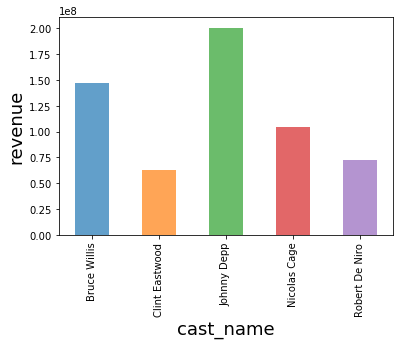

In [56]:
#find out the revenue of movies by the top cast
cast_names=['Nicolas Cage','Robert De Niro','Bruce Willis','Clint Eastwood','Johnny Depp']
nicolas=df.query('cast in @  cast_names').groupby('cast')['revenue'].mean()
nicolas.plot(kind='bar',alpha=0.7)
plt.xlabel('cast_name',fontsize=18)
plt.ylabel('revenue',fontsize=18)
plt.show()

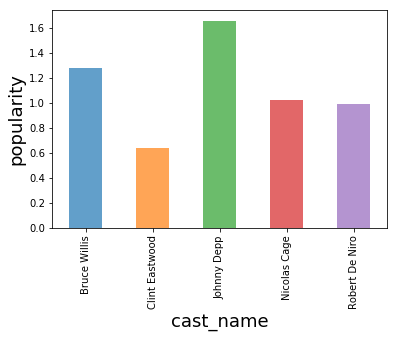

In [57]:
#find out the popularity of movies by the top cast
cast_names=['Nicolas Cage','Robert De Niro','Bruce Willis','Clint Eastwood','Johnny Depp']
nicolas=df.query('cast in @  cast_names').groupby('cast')['popularity'].mean()
nicolas.plot(kind='bar',alpha=0.7)
plt.xlabel('cast_name',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.show()

<a id='conclusions'></a>
## Conclusions

> Conclusions
The goal in the research is primary to explore three parts of questions:

>Part one: Find the quantitative features that are associated with Successful Movies

>At part one, I explored some general questions. The result showed that the movie popularity increased by years. 
The movie with higher budget level and revenue level received higher popularity. But the rating is not affected by the budget and revenue. So I looked at the relation between popularity and rating. The result showed that the movies with higher rating are more popular. the runtime does not affect people's rating. But the movie with either short runtime or long runtime receives higher popularity.

>Part two:  Find the categorical features that are associated with Successful Movies

>At this part, I find that the most popular movie type at different revenue and rating level are drama, comedy, and action. Drama received the highest voting, and Action get the highest revenue. Also, I find the most active cast are Nicolas Cage,Robert De Niro,Bruce Willis. Althogh Johnny Depp produced less movie, but his movies receive the highest rating. 

